In [544]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [545]:
df = pd.read_csv('PIMA.csv')

In [546]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [547]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [548]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [549]:
df.drop(['DiabetesPedigreeFunction'], axis = 1, inplace=True)

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    2000 non-null   int64  
 1   Glucose        2000 non-null   int64  
 2   BloodPressure  2000 non-null   int64  
 3   SkinThickness  2000 non-null   int64  
 4   Insulin        2000 non-null   int64  
 5   BMI            2000 non-null   float64
 6   Age            2000 non-null   int64  
 7   Outcome        2000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 125.1 KB


In [551]:
df['BloodPressure'].loc[(df['BloodPressure'] <= 30)] = np.nan
df['Glucose'].loc[(df['Glucose'] <= 45)] = np.nan

/tmp/ipykernel_11766/684818280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BloodPressure'].loc[(df['BloodPressure'] <= 30)] = np.nan
/tmp/ipykernel_11766/684818280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Glucose'].loc[(df['Glucose'] <= 45)] = np.nan


In [552]:
df = df.dropna()

In [553]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,2,138.0,62.0,35,0,33.6,47,1
1,0,84.0,82.0,31,125,38.2,23,0
3,0,135.0,68.0,42,250,42.3,24,1
4,1,139.0,62.0,41,480,40.7,21,0
5,0,173.0,78.0,32,265,46.5,58,0
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0,24,55,29.7,33,0
1996,8,179.0,72.0,42,130,32.7,36,1
1997,6,85.0,78.0,0,0,31.2,42,0
1998,0,129.0,110.0,46,130,67.1,26,1


In [554]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [555]:
X = X.to_numpy()
y = y.to_numpy()

In [556]:
X

array([[  2. , 138. ,  62. , ...,   0. ,  33.6,  47. ],
       [  0. ,  84. ,  82. , ..., 125. ,  38.2,  23. ],
       [  0. , 135. ,  68. , ..., 250. ,  42.3,  24. ],
       ...,
       [  6. ,  85. ,  78. , ...,   0. ,  31.2,  42. ],
       [  0. , 129. , 110. , ..., 130. ,  67.1,  26. ],
       [  2. ,  81. ,  72. , ...,  76. ,  30.1,  25. ]])

In [557]:
y

array([1, 0, 1, ..., 0, 1, 0])

In [558]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [559]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# RFC

In [560]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# ANN

In [561]:
model_ann = tf.keras.models.Sequential()

# ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
model_ann.add(tf.keras.layers.Dense(units=131, activation='relu'))
model_ann.add(tf.keras.layers.Dense(units=274, activation='relu'))
model_ann.add(tf.keras.layers.Dense(units=479, activation='relu'))
model_ann.add(tf.keras.layers.Dense(units=389, activation='relu'))
model_ann.add(tf.keras.layers.Dense(units=59, activation='relu'))
model_ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


model_ann.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')
             ])

In [562]:
model_ann.fit(X_train, y_train, batch_size=32, epochs=300)

Epoch 1/300
48/48 [==============================] - 1s 5ms/step - loss: 0.5374 - accuracy: 0.7378 - precision: 0.6182 - recall: 0.4936 
Epoch 2/300
48/48 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.7808 - precision: 0.6725 - recall: 0.6746
Epoch 3/300
48/48 [==============================] - 0s 5ms/step - loss: 0.3990 - accuracy: 0.8034 - precision: 0.7018 - recall: 0.6902
Epoch 4/300
48/48 [==============================] - 0s 5ms/step - loss: 0.3901 - accuracy: 0.8113 - precision: 0.7032 - recall: 0.7867
Epoch 5/300
48/48 [==============================] - 0s 5ms/step - loss: 0.3489 - accuracy: 0.8260 - precision: 0.7169 - recall: 0.7604
Epoch 6/300
48/48 [==============================] - 0s 5ms/step - loss: 0.3370 - accuracy: 0.8426 - precision: 0.7614 - recall: 0.7805
Epoch 7/300
48/48 [==============================] - 0s 6ms/step - loss: 0.3088 - accuracy: 0.8571 - precision: 0.7550 - recall: 0.8323
Epoch 8/300
48/48 [============================

# CatBoost

In [563]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

cat_model = CatBoostClassifier()

parameters = { 'iterations':[10,12,15,20,25],
               'depth':[5,7,12,15],
               'learning_rate':[0.1,0.01,0.3,0.33],
               'loss_function':['Logloss'],
             }

model_catBoost = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters)

model_catBoost.fit(X_train, y_train)

0:	learn: 0.5850059	total: 1.61ms	remaining: 14.5ms
1:	learn: 0.5293254	total: 4.31ms	remaining: 17.2ms
2:	learn: 0.4930310	total: 5.99ms	remaining: 14ms
3:	learn: 0.4599207	total: 7.9ms	remaining: 11.8ms
4:	learn: 0.4370265	total: 9.46ms	remaining: 9.46ms
5:	learn: 0.4163258	total: 10.9ms	remaining: 7.27ms
6:	learn: 0.4039125	total: 12.4ms	remaining: 5.3ms
7:	learn: 0.3911796	total: 13.8ms	remaining: 3.44ms
8:	learn: 0.3810411	total: 15.2ms	remaining: 1.68ms
9:	learn: 0.3724581	total: 16.6ms	remaining: 0us
0:	learn: 0.5905896	total: 1.45ms	remaining: 13ms
1:	learn: 0.5366589	total: 3.02ms	remaining: 12.1ms
2:	learn: 0.4996551	total: 4.57ms	remaining: 10.7ms
3:	learn: 0.4666418	total: 6.4ms	remaining: 9.61ms
4:	learn: 0.4453798	total: 9.47ms	remaining: 9.47ms
5:	learn: 0.4230393	total: 11.2ms	remaining: 7.47ms
6:	learn: 0.4084736	total: 12.7ms	remaining: 5.45ms
7:	learn: 0.3974617	total: 16.1ms	remaining: 4.03ms
8:	learn: 0.3884616	total: 17.8ms	remaining: 1.98ms
9:	learn: 0.3755488	to

RandomizedSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f790f39ca00>,
                   param_distributions={'depth': [5, 7, 12, 15],
                                        'iterations': [10, 12, 15, 20, 25],
                                        'learning_rate': [0.1, 0.01, 0.3, 0.33],
                                        'loss_function': ['Logloss']})

# XGBoost

In [564]:
from xgboost import XGBClassifier
model_xgBoost = XGBClassifier()
model_xgBoost.fit(X_train, y_train)

/home/ad.rapidops.com/satyam.chatrola/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:41:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [565]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV

# xg_model = XGBClassifier()

# parameters = { 'iterations':[10,12,15,20,25],
#                'depth':[5,7,12,15],
#                'learning_rate':[0.1,0.01,0.3,0.33],
#                'loss_function':['Logloss'],
#              }

# model_xgBoost = RandomizedSearchCV(estimator=xg_model, param_distributions=parameters)

# model_xgBoost.fit(X_train, y_train)

In [566]:
# model_xgBoost.predict([X_test[0]])

In [567]:
# model_xgBoost.predict_proba([X_test[0]])[0][1]

# XGBRF

In [568]:
from xgboost import XGBRFClassifier
model_xgbrfc = XGBRFClassifier()
model_xgbrfc.fit(X_train, y_train)

[00:41:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None)

In [569]:
# model_xgbrfc.predict([X_test[0]])

In [570]:
# model_xgbrfc.predict_proba([X_test[0]])[0][1]

In [571]:
# model_rfc.predict_proba([X_test[0]])[0][1]

In [572]:
# model_ann.predict(np.array([X_test[0]]))[0][0]

In [573]:
def format_output(inputValue):
    if inputValue >= 0.5:
        return 1
    else:
        return 0

In [574]:
ansTotalArray = []

In [586]:
def predict_answer(paramList):
    ans_RFC = format_output(model_rfc.predict_proba([paramList])[0][1])
    ans_ANN = format_output(model_ann.predict(np.array([paramList]))[0][0])
    ans_CB = format_output(model_catBoost.predict_proba(paramList)[1])
    ans_XG = format_output(model_xgBoost.predict([paramList]))
    ans_XGBRFC = format_output(model_xgbrfc.predict([paramList]))

    ans_total = ans_RFC + ans_ANN + ans_CB + ans_XG + ans_XGBRFC
    
    ansTotalArray.append(ans_total)

    if ans_total > 2:
        return 1
    else:
        return 0

In [587]:
# for ix in X_test:
#     print(ix)

In [588]:
y_pred = []

for i in X_test:
    y_pred.append(predict_answer(i))

y_pred = np.array(y_pred)

In [589]:
from sklearn.metrics import accuracy_score, precision_score,fbeta_score, f1_score
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(fbeta_score(y_test, y_pred, beta=0.5))
print(f1_score(y_test, y_pred))

0.9629629629629629
0.9224806201550387
0.9311424100156495
0.9444444444444443


In [590]:
# print(ansTotalArray)

In [591]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[245,  10],
       [  4, 119]])

In [592]:
import sklearn.metrics as metrics

preds = y_pred

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


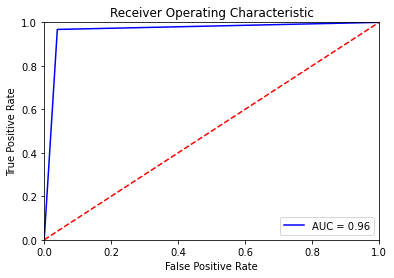

In [593]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [594]:
y_pred = model_xgBoost.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score,fbeta_score, f1_score
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(fbeta_score(y_test, y_pred, beta=0.5))
print(f1_score(y_test, y_pred))

0.9603174603174603
0.9029850746268657
0.9180576631259484
0.9416342412451362


In [595]:
import sklearn.metrics as metrics

preds = y_pred

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


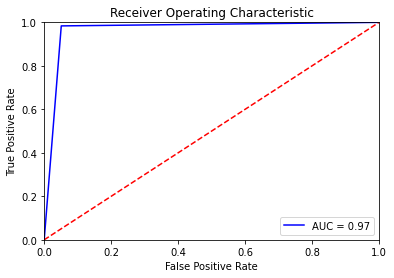

In [596]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()